## Predicting players rating
In this project you are going to predict the overall rating of soccer player based on their attributes
such as 'crossing', 'finishing etc.
The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than
10,000 players for European professional soccer seasons from 2008 to 2016.
Download the data in the same folder and run the following commmand to get it in the environment

### Import required libraries

In [206]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
from math import sqrt
from matplotlib import pyplot as plt
import xgboost as xgb
%matplotlib inline

## Step:1 Download Data from source

In [67]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

## Step:2 Exploring Data

In [68]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
id,1,2,3,4,5,6,7,8,9,10
player_fifa_api_id,218353,218353,218353,218353,218353,189615,189615,189615,189615,189615
player_api_id,505942,505942,505942,505942,505942,155782,155782,155782,155782,155782
date,2016-02-18 00:00:00,2015-11-19 00:00:00,2015-09-21 00:00:00,2015-03-20 00:00:00,2007-02-22 00:00:00,2016-04-21 00:00:00,2016-04-07 00:00:00,2016-01-07 00:00:00,2015-12-24 00:00:00,2015-12-17 00:00:00
overall_rating,67,67,62,61,61,74,74,73,73,73
potential,71,71,66,65,65,76,76,75,75,75
preferred_foot,right,right,right,right,right,left,left,left,left,left
attacking_work_rate,medium,medium,medium,medium,medium,high,high,high,high,high
defensive_work_rate,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium
crossing,49,49,49,48,48,80,80,79,79,79


### Data columns

In [69]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

### Data description

In [70]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122B4FF0>,
      dtype=object)

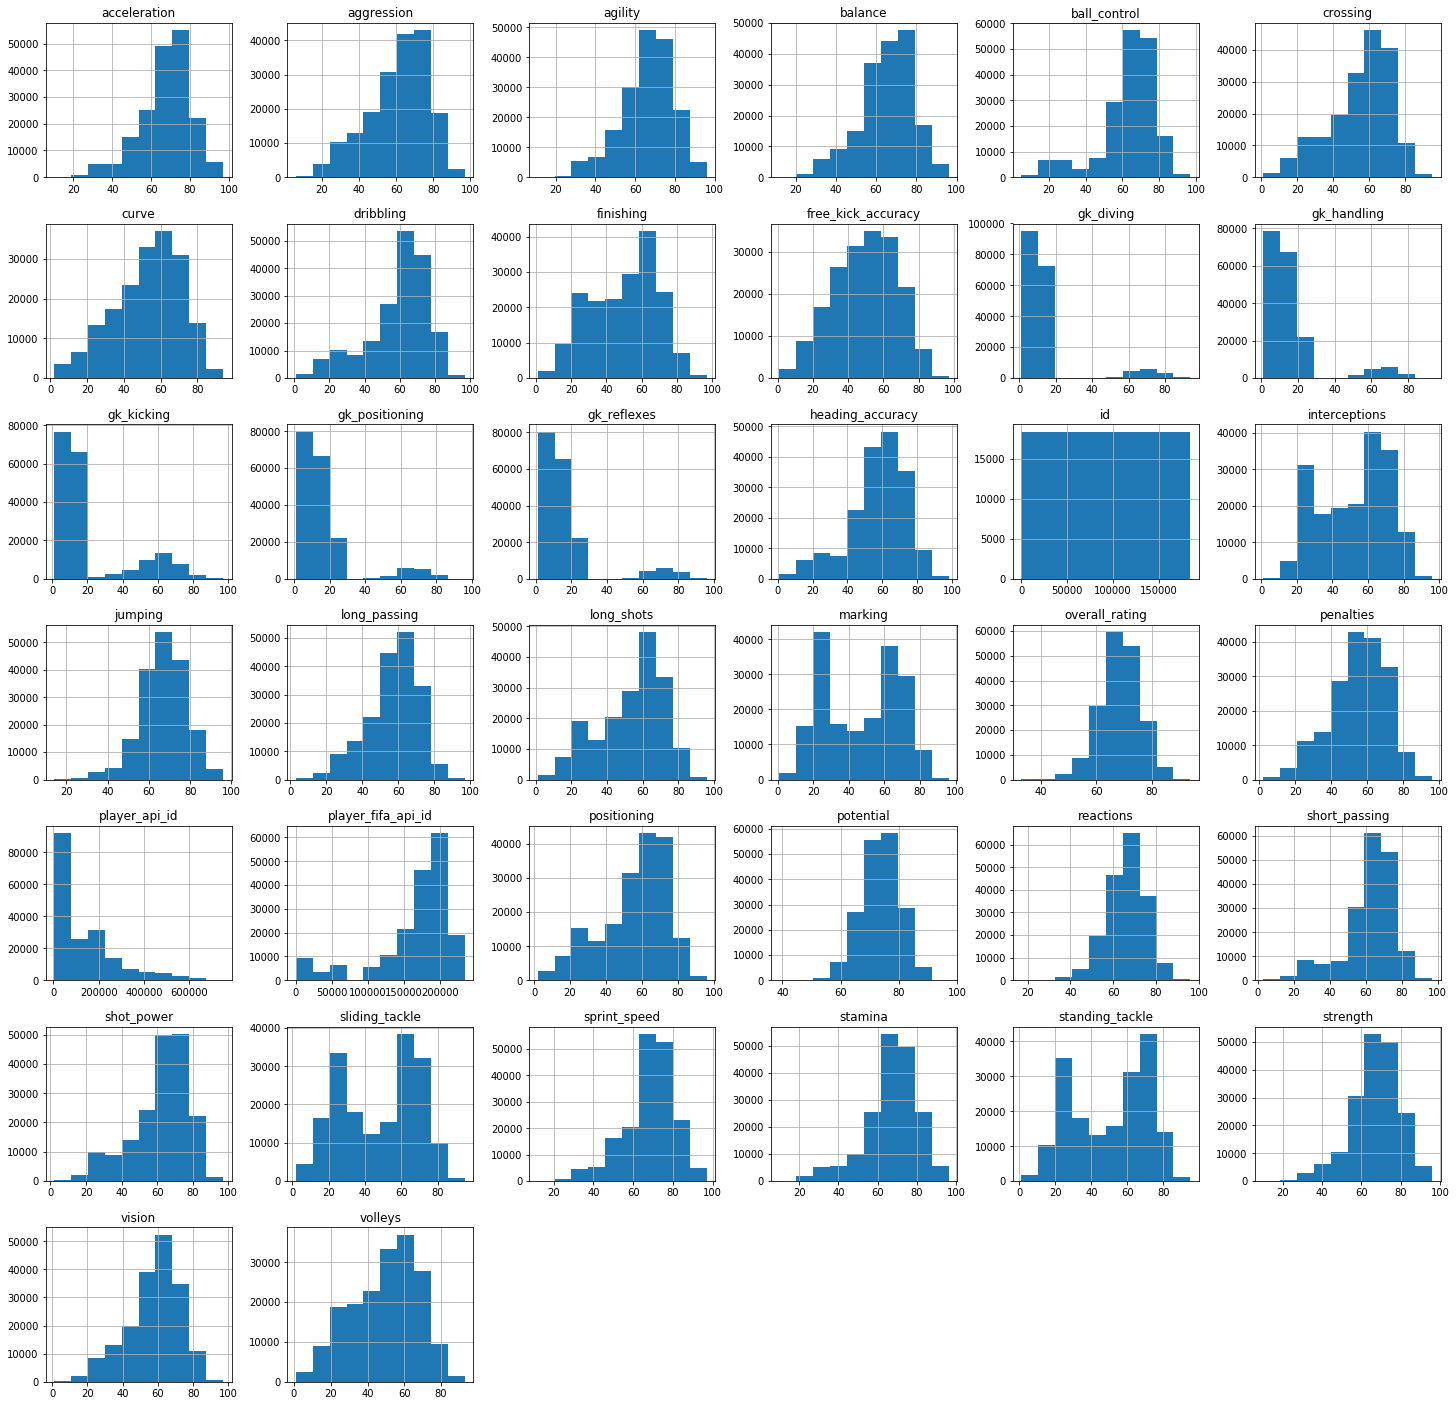

In [71]:
df.hist(figsize=(25,25))

### Count of null values in each column

In [72]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

### Unique values in Categorical Variable

In [73]:
df.preferred_foot.unique()

array(['right', 'left', None], dtype=object)

In [74]:
df.attacking_work_rate.unique()

array(['medium', 'high', None, 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [75]:
df.defensive_work_rate.unique()

array(['medium', 'high', 'low', '_0', None, '5', 'ean', 'o', '1', 'ormal',
       '7', '2', '8', '4', 'tocky', '0', '3', '6', '9', 'es'],
      dtype=object)

## Step:3 Data Cleaning

### Drop null values

In [76]:
total_rows_with_null_values = df.shape[0]
df=df.dropna()
total_rows_removed = total_rows_with_null_values - df.shape[0]
print("Total Rows Removed {}".format(total_rows_removed))

Total Rows Removed 3624


### Convert Categorical values into numerical values

In [77]:
preferred_foot_num = pd.factorize(df.preferred_foot)
attacking_work_rate_num = pd.factorize(df.attacking_work_rate)
defensive_work_rate = pd.factorize(df.defensive_work_rate)

In [87]:
df.preferred_foot=preferred_foot_num[0]
df.attacking_work_rate = attacking_work_rate_num[0]
df.defensive_work_rate = defensive_work_rate[0]


## Step: 4 Feature Correlation Analysis

In [86]:
df.corr().sort_values(['overall_rating'])['overall_rating']

player_api_id         -0.328315
player_fifa_api_id    -0.278703
id                    -0.003738
preferred_foot         0.001417
gk_handling            0.006717
gk_reflexes            0.007804
gk_positioning         0.008029
defensive_work_rate    0.023312
gk_diving              0.027675
gk_kicking             0.028799
attacking_work_rate    0.069407
sliding_tackle         0.128054
marking                0.132185
balance                0.160211
standing_tackle        0.163986
agility                0.239963
acceleration           0.243998
interceptions          0.249094
sprint_speed           0.253048
jumping                0.258978
heading_accuracy       0.313324
strength               0.315684
aggression             0.322782
stamina                0.325606
finishing              0.330079
free_kick_accuracy     0.349800
dribbling              0.354191
crossing               0.357320
curve                  0.357566
volleys                0.361739
positioning            0.368978
long_sho

#### Note :  As per above analysis, features which are correlated morethan .3 with overal rating has been considered for traning model
Features List :
heading_accuracy       (0.313324)
strength               (0.315684)
aggression             (0.322782)
stamina                (0.325606)
finishing              (0.330079)
free_kick_accuracy     (0.349800)
dribbling              (0.354191)
crossing               (0.357320)
curve                  (0.357566)
volleys                (0.361739)
positioning            (0.368978)
long_shots             (0.392668)
penalties              (0.392715)
shot_power             (0.428053)
vision                 (0.431493)
long_passing           (0.434525)
ball_control           (0.443991)
short_passing          (0.458243)
potential              (0.765435)
reactions              (0.771856)

In [92]:
data = df[['heading_accuracy','strength','aggression','stamina','finishing','free_kick_accuracy','dribbling','crossing','curve','volleys','positioning','long_shots','penalties','shot_power','vision','long_passing','ball_control','short_passing','potential','reactions','overall_rating']].copy()

In [93]:
data.head()

,heading_accuracy,strength,aggression,stamina,finishing,free_kick_accuracy,dribbling,crossing,curve,volleys,...,long_shots,penalties,shot_power,vision,long_passing,ball_control,short_passing,potential,reactions,overall_rating
0,71.0,76.0,71.0,54.0,44.0,39.0,51.0,49.0,45.0,44.0,...,35.0,48.0,55.0,54.0,64.0,49.0,61.0,71.0,47.0,67.0
1,71.0,76.0,71.0,54.0,44.0,39.0,51.0,49.0,45.0,44.0,...,35.0,48.0,55.0,54.0,64.0,49.0,61.0,71.0,47.0,67.0
2,71.0,76.0,63.0,54.0,44.0,39.0,51.0,49.0,45.0,44.0,...,35.0,48.0,55.0,54.0,64.0,49.0,61.0,66.0,47.0,62.0
3,70.0,76.0,62.0,54.0,43.0,38.0,50.0,48.0,44.0,43.0,...,34.0,47.0,54.0,53.0,63.0,48.0,60.0,65.0,46.0,61.0
4,70.0,76.0,62.0,54.0,43.0,38.0,50.0,48.0,44.0,43.0,...,34.0,47.0,54.0,53.0,63.0,48.0,60.0,65.0,46.0,61.0


## Step: 5 Split Data for Training & Testing

In [134]:
X = np.asarray(data[['heading_accuracy','strength','aggression','stamina','finishing','free_kick_accuracy','dribbling','crossing','curve','volleys','positioning','long_shots','penalties','shot_power','vision','long_passing','ball_control','short_passing','potential','reactions']])
#X = np.asarray(data[['volleys','positioning','long_shots','penalties','shot_power','vision','long_passing','ball_control','short_passing','potential','reactions']])
Y = np.asarray(data.overall_rating)

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33)

### 1.  LinearRegression

In [187]:
lregr = LinearRegression()
# Fit data
lregr.fit(X_train, Y_train)
# Predict Y values
Y_pred = lregr.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
#  variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 10.83
Variance score: 0.78


### 2. DecisionTreeRegressor

#### Hyperparameter tuning

In [203]:
# scoring method
scoring = make_scorer(r2_score)

# GridSearchCV
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)
g_cv.fit(X_train, Y_train)

#best hyper parameters
g_cv.best_params_

{'min_samples_split': 4}

In [204]:
dregr = DecisionTreeRegressor(random_state=0,min_samples_split= 4)
# Fit Data
dregr.fit(X_train, Y_train)
# Predict Y Value
Y_pred = dregr.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
#  variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 3.22
Variance score: 0.94


### 3. RandomForestRegressor

#### Hyper Parameter Tuning

In [ ]:
# scoring method
scoring = make_scorer(r2_score)

# GridSearchCV
g_cv = GridSearchCV(RandomForestRegressor(),
              param_grid={'max_features':range(2,10), 'min_samples_split':range(2,10), 'min_samples_leaf':range(2,10)},
              scoring=scoring, cv=5, refit=True)
g_cv.fit(X_train, Y_train)
#best hyper parameters
g_cv.best_params_

In [202]:
ranregr = RandomForestRegressor(max_features=2, min_samples_split=4, n_estimators=50, min_samples_leaf=2)
# Fit Data
ranregr.fit(X_train, Y_train)
# Predict Y Value
Y_pred = ranregr.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 1.77
Variance score: 0.96


### 4. XGBoost Regressor

In [ ]:
# scoring method
scoring = make_scorer(r2_score)

# GridSearchCV
g_cv = GridSearchCV(xgb.XGBRegressor(),
              param_grid={'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [20,25,30,35,40,45,50]},
              scoring=scoring, cv=5, refit=True)
g_cv.fit(X_train, Y_train)
#best hyper parameters
g_cv.best_params_

In [221]:
xgregr=xgb.XGBRegressor(min_child_weight=11,gamma=0.5,subsample=0.8,colsample_bytree=0.6,max_depth=65)
# Fit Data
xgregr.fit(X_train, Y_train)
# Predict Y Value
Y_pred = xgregr.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
#  variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 1.19
Variance score: 0.98


## Note : From the analysis above we can see that XGBost is giveing less Mean Squared Error & highest  Variance Score